In [2]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import keras
from keras.layers import Layer
from keras.datasets import cifar10, mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import activations
from keras.models import Sequential
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers

import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# import the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# normalize data
mean = np.mean(x_train, axis = (0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train-mean)/(std + 1e-7)
x_test = (x_test-mean)/(std+1e-7)

# consider augmentating data by flipping images, rotating, etc to force generalization of model
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
# define model
model = Sequential()

filters = 16
kernel_size = (3,3)
stride_step = (1,1)

model.add(Conv2D(filters,kernel_size, input_shape=x_train[0].shape, strides=stride_step, padding ='same', activation='relu'))
model.add(Conv2D(filters*2,kernel_size, strides=stride_step, padding ='same', activation='relu'))
model.add(Conv2D(filters*4,kernel_size, strides=stride_step, padding ='same', activation='relu'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16777472  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 16,803,626
Trainable params: 16,803,626
Non-trainable params: 0
_______________________________________

In [0]:
# do some learning / optimization
learning_rate = 0.5
lr_decay = 0.95
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])



In [18]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 18s 367us/step - loss: 1.9885 - acc: 0.3031 - val_loss: 1.8685 - val_acc: 0.3447
Epoch 2/20
50000/50000 [==============================] - 18s 362us/step - loss: 1.8410 - acc: 0.3546 - val_loss: 1.8277 - val_acc: 0.3577
Epoch 3/20
50000/50000 [==============================] - 18s 363us/step - loss: 1.8051 - acc: 0.3672 - val_loss: 1.8048 - val_acc: 0.3670
Epoch 4/20
50000/50000 [==============================] - 18s 367us/step - loss: 1.7846 - acc: 0.3764 - val_loss: 1.7915 - val_acc: 0.3738
Epoch 5/20
50000/50000 [==============================] - 18s 366us/step - loss: 1.7696 - acc: 0.3819 - val_loss: 1.7832 - val_acc: 0.3798
Epoch 6/20
50000/50000 [==============================] - 18s 357us/step - loss: 1.7577 - acc: 0.3869 - val_loss: 1.7747 - val_acc: 0.3792
Epoch 7/20
50000/50000 [==============================] - 18s 355us/step - loss: 1.7482 - acc: 0.3893 - val_loss: 1.

10000/10000 [==============================] - 2s 183us/step


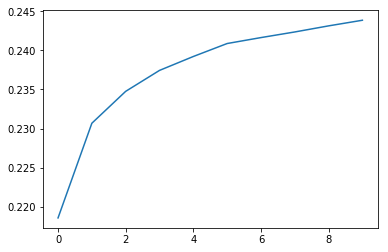

In [8]:
# test model
model.evaluate(x_test,y_test)
model.predict(x_test)
plt.plot(history.history['acc'])

In [0]:
#model.save('gdrive/My Drive/ML/testmodel.h5')

In [0]:
#model2 = load_model('gdrive/My Drive/ML/testmodel.h5')